# Lecture 3. numpy, pandas, matplotlib

<center>
<img src="https://camo.githubusercontent.com/2eb0e1096ba504bf9e1446db83a6d1753c3af994/68747470733a2f2f6b6f7a696b6f772e66696c65732e776f726470726573732e636f6d2f323031362f30372f73637265656e73686f74312e706e673f773d31313430" alt="Drawing" style="width: 700px;"/>
</center>

<font color='orange'>
Seunghyeon Yu
</font>

# Overview

* intro
* numpy
* pandas
* matplotlib

## Why we use packages?
> "Stand on the shoulders of giants"
> -Issac Newton

* Time Saving
* Stability (by many open source contributors, [GitHub](https://github.com/))
* Nice Documentations ([Read the Docs](https://readthedocs.org/))
* Have Fun!

## Package Dependencies

<center>
<img src="https://qph.ec.quoracdn.net/main-qimg-fad2e6702b134e3853707daa53214314" alt="Drawing" style="width: 600px;"/>

## Package Structure
```
game/
    __init__.py
    sound/
        __init__.py
        echo.py
        wav.py
    graphic/
        __init__.py
        screen.py
        render.py
    play/
        __init__.py
        run.py
        test.py
```
* `__init__.py` : Required to make the directories as pakcages.

# NumPy

<center>
<img src="https://www.kdnuggets.com/wp-content/uploads/numpy-logo.jpg" alt="Drawing" style="width: 300px;"/>
</center>

* Similar to Matlab
* N-dimensional object
* Mathematical functions
* Fast calculation 
* Linear algebra, Fourier transform, random number generation, Einstein summation ...

In [ ]:
import numpy as np

### Arrays
**1D Array **

In [ ]:
x = np.array([1, 2, 3, 4])
x.shape

In [ ]:
x = np.array([1, 2, 3, 4], dtype=np.float64)  # datatype to float64
x

**2D Array**

In [ ]:
X = np.array([[1,2,3],
              [4,5,6]])
X.shape

**reshape**

In [ ]:
X.reshape(6)

In [ ]:
X.reshape(6,1)

In [ ]:
X.reshape(1,6)

In [ ]:
X.reshape(1,-1)

Numpy also provides many functions to create arrays:

In [ ]:
np.zeros((2,2))  # Create an array of all zeros

In [ ]:
np.ones((1,2))   # Create an array of all ones

In [ ]:
np.full((2,2), 7) # Create a constant array

In [ ]:
np.eye(2)         # Create a 2x2 identity matrix

In [ ]:
np.random.random((2,2)) # Create an array filled with random values

### Array Indexing

In [ ]:
A = np.array([[1, 2, 3, 4],  # ----> x-axis
              [5, 6, 7, 8],  # |
              [9,10,11,12]]) # v
                             #   y-axis

In [ ]:
A[:2, 1:3]      # a[y-axis, x-axis]

In [ ]:
A[0, 3]

In [ ]:
A[0, :]           # 0th row of a

### Array Math

In [ ]:
X = np.array([[1, 2],
              [3, 4]])
Y = np.array([[5, 6],
              [7, 8]])

** Elementwise Math **

In [ ]:
X + Y

In [ ]:
X - Y

In [ ]:
X*Y

In [ ]:
X/Y

In [ ]:
np.sqrt(X)

In [ ]:
np.sum(X, axis=0)

In [ ]:
np.sum(X, axis=1)

**Matrix Operations**

In [ ]:
X.dot(Y)

In [ ]:
X.T

In [ ]:
np.linalg.inv(X)

In [ ]:
np.outer(X, Y)

In [ ]:
X.diagonal()

In [ ]:
X.trace()

** [EX 1] Ordinary Least Square **
$$
    \beta = (X'X)^{-1}X'y
$$

In [ ]:
X = np.array([[1, 2, 1],
              [3, 4, 2],
              [1, 2, 3],
              [1, 0, 5]])
y = np.array([2, 4, 2, 0])

In [ ]:
np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

** Random Number Generation **

In [ ]:
np.random.rand(5)          # 5 samples from the uniform random 0~1

In [ ]:
np.random.randn(5)         # 5 samples from the normal distribution

In [ ]:
u = np.array([1, 2, 3])    # mean vector
S = np.array([[7, 1, 3],   # covariance matrix
              [1, 5, 1],
              [3, 1, 4]])

np.random.multivariate_normal(mean=u, cov=S, size=5)

## Tensor Operation (Optional)

** [About Tensors](https://www.tensorflow.org/versions/r0.12/resources/dims_types) ** 

| Rank | Math entity            | Python Example      | Tensor Notation
|------|------------------------|---------------------|--------------------
| 0    | Scalar (rank 0 Tensor) | `s = 483 `          |$T$             |
| 1    | Vector (rank 1 Tensor) |` v = [1.1, 2.2, 3.3]` |$T_{i}$  |
| 2    | Matrix (rank 2 Tensor) | `m = [[1, 2, 3], [4,5,6]]`     |$T_{ij}$       |
| 3    | rank 3 Tensor          |` t = [[[1,2], [4,5]], [[6,7], [8,9]]]`|$T_{ijk}$    |
| n    | rank n Tensor          | ....                |$T_{ijkl...}$        |

### einsum (Einstein Summation Convention) 


In [ ]:
x, y = np.array([1,2,3,4]), np.array([1,2,1,2])

** vector sum **

In [ ]:
np.einsum('i->', x)

** dot product **

In [ ]:
np.einsum('i,i -> ', x, y)

** elementwise product **

In [ ]:
np.einsum('i,i -> i', x, y)

**outer product**

In [ ]:
np.einsum('i,j -> ij', x, y)

In [ ]:
X = np.array([[0,1,1,1],
             [2,3,1,4], 
             [1,2,1,4], 
             [5,2,1,2]])
Y = np.array([[4,2,3,1],
              [1,4,2,3],
              [1,2,1,1],
              [2,1,4,2]])

$X\vec{y}$

In [ ]:
np.einsum('ij,j->i', X, y)

$\vec{y}^T X$

In [ ]:
np.einsum('i,ij->j', y, X)

$XY$

In [ ]:
np.einsum('ij,jk->ik', X, Y)

** Tensor Vector Product **

<center>
<img src="https://i.stack.imgur.com/5QsMD.png" alt="Drawing" style="width: 600px;"/>
</center>

For more detail, see [here](http://venus.unive.it/r.casarin/PhDEco/Mat/Algebra.pdf).

$T_{ijk} y^i$

In [ ]:
T = np.random.randn(4,4,4)

In [ ]:
np.einsum('ijk,i->jk',T, y)

# Pandas

<center>
<img src="https://pandas.pydata.org/_static/pandas_logo.png" alt="Drawing" style="width: 600px;"/>
</center>
* Similar to R
* DataFrame object
* Apply functions
* Data merge, join, concatenate ...
* Data operations ...

In [1]:
import pandas as pd

## Series
(= 1D Array + index (or key))

In [2]:
x = pd.Series([1,2,3,4,5])
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

** Index **

In [4]:
x.index = ['a', 'b', 'c', 'e', 'f']

In [5]:
x

a    1
b    2
c    3
e    4
f    5
dtype: int64

** Indexing **

In [15]:
x[(x > 2)&(x%4==1)]

f    5
dtype: int64

** Elementwise Math **

In [21]:
np.exp(x)

a      2.718282
b      7.389056
c     20.085537
e     54.598150
f    148.413159
dtype: float64

** Missing Value **

In [30]:
x = pd.Series([1,45,2,3,1,3,np.nan,1,3,2])

In [28]:
x[pd.isnull(x)] = 0

In [32]:
x.fillna(0)

0     1.0
1    45.0
2     2.0
3     3.0
4     1.0
5     3.0
6     0.0
7     1.0
8     3.0
9     2.0
dtype: float64

In [38]:
x[~pd.isnull(x)]

0     1.0
1    45.0
2     2.0
3     3.0
4     1.0
5     3.0
7     1.0
8     3.0
9     2.0
dtype: float64

## DataFrame

In [42]:
A = pd.DataFrame([[1,2,3], 
              [4,5,6],
              [7,8,9]])

In [67]:
del A['a']

In [72]:
A.set_index('c')

,b,b plus c,return
c,,,
3,2,5,5
6,5,11,11
9,8,17,17


In [57]:
A['return'] = A['b'] + A['c']

** Retreiving **

> **<font color='red'> Caution ! </font>** **Not Recommend**

> attribute access using (**.**) can collide with other class methods. 

**Describe (Summary Statistics) **

** Add, Delete Columns **

** Add, Delete Rows **

** Set Index **

**Transpose **

In [75]:
A.values

array([[ 2,  3,  5,  5],
       [ 5,  6, 11, 11],
       [ 8,  9, 17, 17]], dtype=int64)

** Selection, Filtering **

In [83]:
mask = (A['b']  <10)&(A['c'] >7)
A[mask]

,b,c,b plus c,return
2,8,9,17,17


In [111]:
A['date2'] = ['1-1','1-1','1-2']

In [117]:
pd.concat([A.set_index('date'), A.set_index('date2')], axis=1)

ValueError: Shape of passed values is (10, 3), indices imply (10, 2)

** Apply Functions **

<center>
<img src="https://i.stack.imgur.com/DL0iQ.jpg" alt="Drawing" style="width: 500px;"/>

In [84]:
def my_mean(col):
    return np.mean(col)

In [90]:
A.sort_values(by=['b','c'])

,b,c,b plus c,return
0,2,3,5,5
1,5,6,11,11
2,8,9,17,17


** Elementwise Apply Function **

** Sorting **

## Data Merge, Join

<center>
<img src="https://i.stack.imgur.com/hMKKt.jpg" alt="Drawing" style="width: 500px;"/>
</center>
See [here](https://pandas.pydata.org/pandas-docs/stable/merging.html).

**Concatenate**
<center>
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png" alt="Drawing" style="width: 400px;"/>
</center>

In [93]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                     index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'Z': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],     
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [94]:
pd.concat([df1, df2, df3])

,A,B,C,D,Z
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,A4,B4,NaN,D4,C4
5,A5,B5,NaN,D5,C5
6,A6,B6,NaN,D6,C6
7,A7,B7,NaN,D7,C7
8,A8,B8,C8,D8,NaN
9,A9,B9,C9,D9,NaN


**Outer Join**
<center>
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_axis1.png" alt="Drawing" style="width: 600px;"/>
</center>

In [95]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [100]:
pd.concat([df1, df4], axis=1, join_axes=[df1.index])

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


**Inner Join**
<center>
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_axis1_inner.png" alt="Drawing" style="width: 600px;"/>
</center>

**Left Join**
<center>
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_axis1_join_axes.png" alt="Drawing" style="width: 600px;"/>
</center>

** More about SQL-like structures**

| **Merge method** | **SQL Join Name**  | **Descriptions**                          |
| :- | :- | :-
|      `left`      |  `LEFT OUTER JOIN` |       Use keys from left frame only       |
|      `right`     | `Right OUTER JOIN` |       Use keys from right frame only      |
|      `outer`     |  `FULL OUTER JOIN` |     Use union of keys from both frames    |
|      `inner`     |    `INNER JOIN`    | Use intersection of keys from both frames |

For detail, see [here](https://pandas.pydata.org/pandas-docs/stable/merging.html).

**groupby**

In [102]:
A['date'] = ['1-1', '1-2', '1-2']

In [108]:
A.groupby('date').apply(lambda x: x.std() + x.mean())

,b,c,b plus c,return
date,,,,
1-1,NaN,NaN,NaN,NaN
1-2,8.62132,9.62132,18.242641,18.242641


# Matplotlib
<center>
<img src="https://matplotlib.org/_static/logo2.png" alt="Drawing" style="width: 500px;"/>
</center>

* 2D, 3D plotting
* With jupyter, interactive mode

In [1]:
import matplotlib.pyplot as plt

### Basic Line Plot

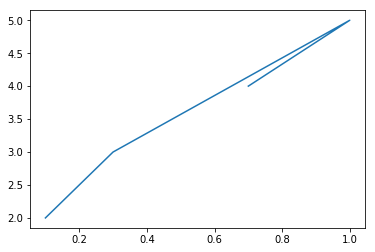

In [6]:
plt.plot([0.1,0.3,1,0.7],[2,3,5,4])
plt.show()

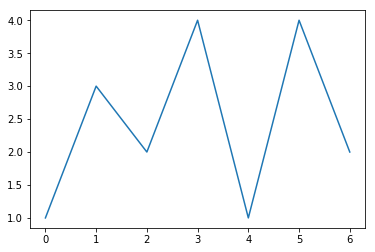

In [8]:
import pandas as pd
pd.Series([1,3,2,4,1,4,2]).plot()
plt.show()

## Scatter Plot

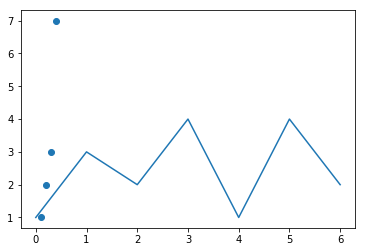

In [12]:
%matplotlib inline
plt.scatter([0.1, 0.3, 0.2, 0.4], [1,3,2,7])
pd.Series([1,3,2,4,1,4,2]).plot()
plt.show()

## Bar Chart

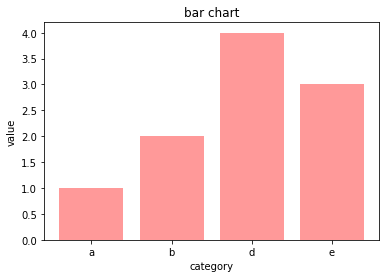

In [22]:
plt.bar(['a', 'b', 'd', 'e'], [1,2,4,3], color='red', alpha=0.4)
plt.title("bar chart")
plt.xlabel("category")
plt.ylabel("value")
plt.show()

## Distribution Plot

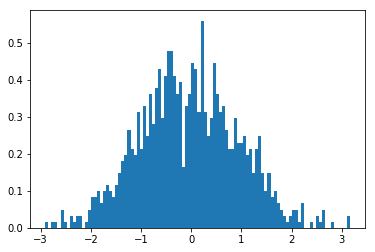

In [31]:
plt.hist(np.random.randn(1000),density=True, bins=100)
plt.show()

## 3D Plot

** 3D Line **

** 3D Scatter **

** 3D Surface **

<center>
<img src="https://ask.qcloudimg.com/http-save/yehe-admin/i3wz4bx7eu.png" alt="Drawing" style="width: 500px;"/>
</center>

## Useful Resources

* [Python Packages Binaries for Windows](https://www.lfd.uci.edu/~gohlke/pythonlibs/)
* [Data-science-notebooks](https://github.com/donnemartin/data-science-ipython-notebooks#deep-learning)

# END